In [1]:
import numpy as nup
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union
from geovoronoi.plotting import subplot_for_map
from geovoronoi.plotting import plot_voronoi_polys_with_points_in_area
from geovoronoi import voronoi_regions_from_coords
from geovoronoi import points_to_coords

In [2]:
# import village location data
village = gpd.read_file('../data/kr_village_osm.json')
village.head(20)

,osmid,cellid,name,name:ko,name:en,geometry
0,307957276,0,증산리,증산리,Jungsan-ri,POINT (127.75270 35.29379)
1,357845891,1,종로3가,종로3가,Jongno 3 Ga;Jongno 3-ga,POINT (126.98990 37.57041)
2,414668757,2,하당리,하당리,Hadangni,POINT (129.32302 37.04005)
3,414679098,3,일과2리,일과2리,Ilgwa 2-ri,POINT (126.22379 33.24585)
4,414883185,4,송산1리,송산1리,Songsan 1 Ri,POINT (127.59929 37.11416)
5,414977250,5,청현리,청현리,Cheonghyeon-ri,POINT (128.01544 35.31568)
6,414977251,6,외율리,외율리,Oeyul-ri,POINT (128.00280 35.27772)
7,414977252,7,신기리,신기리,Sin-gi-ri,POINT (128.00836 35.29920)
8,414977255,8,신기리,신기리,Sin-gi-ri,POINT (128.02911 35.29124)
9,414977257,9,계원리,계원리,Gyewon-ri,POINT (128.03735 35.28188)


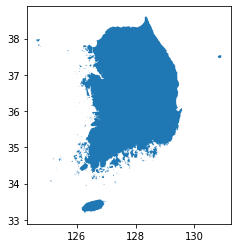

In [3]:
# import boundary data
boundary = gpd.read_file('../data/kr_boundary_simplified_2.json')
boundary.plot()

In [4]:
# convert data to Web Mercator projection
boundary = boundary.to_crs(epsg=3395)
village_projection = village.to_crs(boundary.crs)
# clip villages
village_clipped = gpd.clip(village_projection, boundary)

In [5]:
# convert boundary geometry into a union of the polygon
boundary_shape = cascaded_union(boundary.geometry)
# convert geoseries of point objects to numpy array of coordinates
village_coords = points_to_coords(village_clipped.geometry)
village_coords

array([[14221365.03279203,  4179190.91793163],
       [14136451.00388873,  4492859.82302506],
       [14396173.19065825,  4418949.27309396],
       ...,
       [14170520.61234474,  4483484.34249488],
       [14079824.51550625,  4112824.16191916],
       [14176125.57097008,  4346950.44164966]])

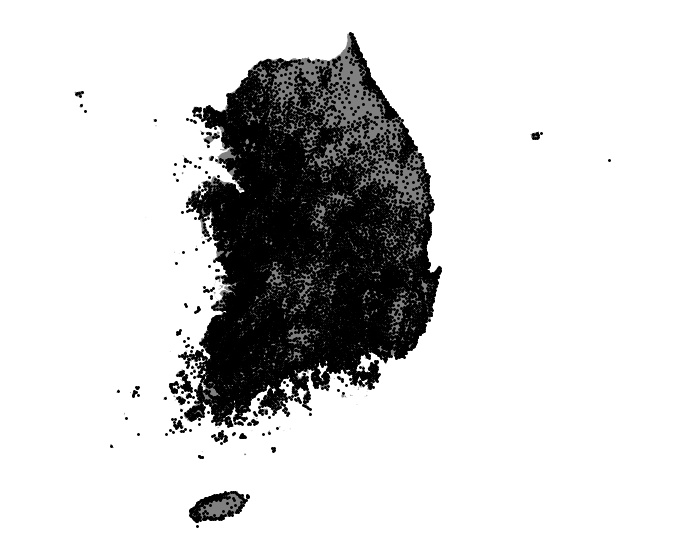

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
boundary.plot(ax=ax, color='gray')
village_projection.plot(ax=ax, markersize=3.5, color='black')
ax.axis('off')
plt.axis('equal')
plt.show()

In [7]:
# calculate voronoi regions
poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(village_coords, boundary_shape)

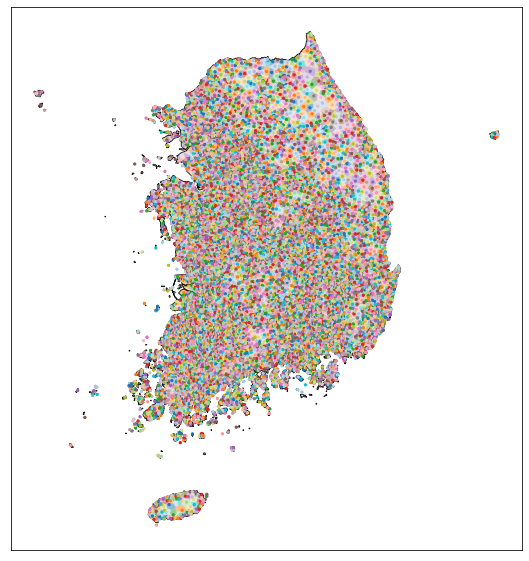

In [8]:
fig, ax = subplot_for_map(figsize=(12, 10))
plot_voronoi_polys_with_points_in_area(ax, boundary_shape, poly_shapes, village_coords, poly_to_pt_assignments)
plt.show()

In [9]:
gdf_streets_by_region = gpd.GeoDataFrame()
for x in range(len(poly_shapes)):
    gdf_streets = gpd.GeoDataFrame()
    gdf_streets['geometry'] = gdf_all_streets.intersection(poly_shapes[x])
    gdf_streets['voronoi_region'] = x
    gdf_streets = gdf_streets[gdf_streets['geometry'].astype(str) != 'LINESTRING EMPTY']
    gdf_streets_by_region = gdf_streets_by_region.append(gdf_streets)

NameError: name 'gdf_all_streets' is not defined

In [19]:
poly_to_pt_assignments[1]

[18665]

In [12]:
gdf_voronoi = gpd.GeoDataFrame()
for x in range(len(poly_shapes)):
    gdf_voronoi_polygon = gpd.GeoDataFrame()
    gdf_voronoi_polygon['geometry'] = poly_shapes[x]
    gdf.append(gdf_voronoi_polygon)

TypeError: cannot concatenate object of type '<class 'shapely.geometry.polygon.Polygon'>'; only Series and DataFrame objs are valid